<a href="https://colab.research.google.com/github/Ronen-CH/ai_DressUp-PF/blob/main/demo/colab_PF_AFN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[PF-AFN](https://github.com/geyuying/PF-AFN)
## conda setup

In [ ]:
import random
import cv2
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow

In [ ]:
# Install conda and add channels to look for packages in
import sys
! wget https://repo.anaconda.com/archive/Anaconda3-2020.02-Linux-x86_64.sh
! chmod +x Anaconda3-2020.02-Linux-x86_64.sh
! bash ./Anaconda3-2020.02-Linux-x86_64.sh -b -f -p /usr/local
sys.path.append('/usr/local/lib/python3.7/site-packages/')
! conda update -n base -c defaults conda -y
! conda config --add channels bioconda
! conda config --add channels conda-forge

--2021-09-11 16:04:12--  https://repo.anaconda.com/archive/Anaconda3-2020.02-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.131.3, 104.16.130.3, 2606:4700::6810:8203, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.131.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 546910666 (522M) [application/x-sh]
Saving to: ‘Anaconda3-2020.02-Linux-x86_64.sh’

Anaconda3-2020.02-L 100%[===================>] 521.57M   157MB/s    in 3.3s    

2021-09-11 16:04:15 (156 MB/s) - ‘Anaconda3-2020.02-Linux-x86_64.sh’ saved [546910666/546910666]

PREFIX=/usr/local
Unpacking payload ...
Solving environment: | / - \ | / - \ | / - done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - _ipyw_jlab_nb_ext_conf==0.1.0=py37_0
    - _libgcc_mutex==0.1=main
    - alabaster==0.7.12=py37_0
    - anaconda-client==1.7.2=py37_0
    - anaconda-navigator==1.9.12=py37_0
    - anaconda-project==0.8.

##PF-FPN Intial setup

In [ ]:
#265 seconds 
!conda create -n tryon python=3.6 -c defaults  -y
!source activate tryon -c defaults  -y
!conda install pytorch=1.1.0 torchvision=0.3.0 cudatoolkit=9.0 -c pytorch
!conda install cupy==6.0.0 -c defaults  -y
#!conda install pillow=6.1
!pip install pillow==6.1
!pip install opencv-python

Solving environment: - \ | / - done

## Package Plan ##

  environment location: /usr/local/envs/tryon

  added / updated specs:
    - python=3.6


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    _openmp_mutex-4.5          |            1_gnu          22 KB
    ca-certificates-2021.7.5   |       h06a4308_1         113 KB
    certifi-2021.5.30          |   py36h06a4308_0         139 KB
    ld_impl_linux-64-2.35.1    |       h7274673_9         586 KB
    libffi-3.3                 |       he6710b0_2          50 KB
    libgcc-ng-9.3.0            |      h5101ec6_17         4.8 MB
    libgomp-9.3.0              |      h5101ec6_17         311 KB
    libstdcxx-ng-9.3.0         |      hd4cf53a_17         3.1 MB
    ncurses-6.2                |       he6710b0_1         817 KB
    openssl-1.1.1l             |       h7f8727e_0         2.5 MB
    pip-21.0.1                 |   py36h06a4308_

In [ ]:
!git clone https://github.com/geyuying/PF-AFN.git

Cloning into 'PF-AFN'...
remote: Enumerating objects: 383, done.
remote: Counting objects: 100% (186/186), done.
remote: Compressing objects: 100% (140/140), done.
remote: Total 383 (delta 74), reused 119 (delta 35), pack-reused 197
Receiving objects: 100% (383/383), 4.49 MiB | 14.38 MiB/s, done.
Resolving deltas: 100% (129/129), done.


In [ ]:
%cd PF-AFN

/content/PF-AFN


In [ ]:
!pwd

/content/PF-AFN


## Setup demo for test

* cd PF-AFN_test
* First, you need to download the checkpoints from checkpoints and put the folder "PFAFN" under the folder "checkpoints". The folder "checkpoints/PFAFN" shold contain "warp_model_final.pth" and "gen_model_final.pth".

* The "dataset" folder contains the demo images for test, where the "test_img" folder contains the person images, the "test_clothes" folder contains the clothes images, and the "test_edge" folder contains edges extracted from the clothes images with the built-in function in python (We saved the extracted edges from the clothes images for convenience). 'demo.txt' records the test pairs.
* During test, a person image, a clothes image and its extracted edge are fed into the network to generate the try-on image. No human parsing results or human pose estimation results are needed for test.

In [ ]:
%cd /content/

/content


In [ ]:
%cd ./PF-AFN/PF-AFN_test

/content/PF-AFN/PF-AFN_test


In [ ]:
!gdown --id 1_a0AiN8Y_d_9TNDhHIcRlERz3zptyYWV

Downloading...
From: https://drive.google.com/uc?id=1_a0AiN8Y_d_9TNDhHIcRlERz3zptyYWV
To: /content/PF-AFN/PF-AFN_test/checkpoints.zip
271MB [00:03, 83.5MB/s]


In [ ]:
!unzip /content/PF-AFN/PF-AFN_test/checkpoints.zip

Archive:  /content/PF-AFN/PF-AFN_test/checkpoints.zip
  inflating: checkpoints/.DS_Store   
  inflating: __MACOSX/checkpoints/._.DS_Store  
   creating: checkpoints/PFAFN/
  inflating: checkpoints/PFAFN/.DS_Store  
  inflating: __MACOSX/checkpoints/PFAFN/._.DS_Store  
  inflating: checkpoints/PFAFN/gen_model_final.pth  
  inflating: checkpoints/PFAFN/warp_model_final.pth  


In [ ]:
!ls /content/PF-AFN/PF-AFN_test/checkpoints

PFAFN


In [ ]:
!ls /content/PF-AFN/PF-AFN_test/checkpoints/PFAFN/

gen_model_final.pth  warp_model_final.pth


##Run the demo

* To test with the saved model, run test.sh and the results will be saved in the folder "results".
* To reproduce our results from the saved model, your test environment should be the same as our test environment, especifically for the version of cupy.

In [ ]:
!pwd

/content/PF-AFN/PF-AFN_test


In [ ]:
%cd /content/

/content


In [ ]:
%cd /content/PF-AFN/PF-AFN_test/

/content/PF-AFN/PF-AFN_test


In [ ]:
! chmod +x test.py

## Test1

In [ ]:
!python test.py --name demo --resize_or_crop None --batchSize 1 --gpu_ids 0

------------ Options -------------
batchSize: 1
data_type: 32
dataroot: dataset/
display_winsize: 512
fineSize: 512
gen_checkpoint: checkpoints/PFAFN/gen_model_final.pth
gpu_ids: [0]
input_nc: 3
isTrain: False
loadSize: 512
max_dataset_size: inf
nThreads: 1
name: demo
no_flip: False
norm: instance
output_nc: 3
phase: test
resize_or_crop: None
serial_batches: False
tf_log: False
use_dropout: False
verbose: False
warp_checkpoint: checkpoints/PFAFN/warp_model_final.pth
-------------- End ----------------
CustomDatasetDataLoader
dataset [AlignedDataset] was created
6
AFWM(
  (image_features): FeatureEncoder(
    (encoders): ModuleList(
      (0): Sequential(
        (0): DownSample(
          (block): Sequential(
            (0): BatchNorm2d(3, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (1): ReLU(inplace)
            (2): Conv2d(3, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
          )
        )
        (1): ResBlock(
          (bloc

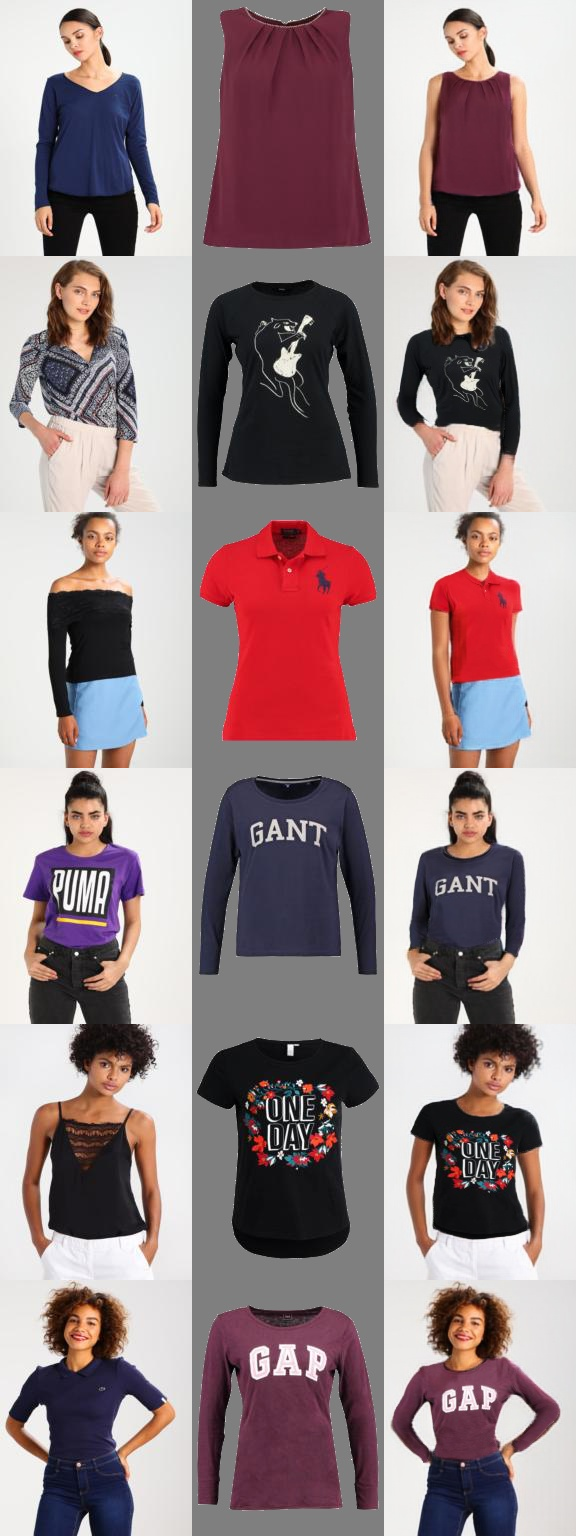

In [ ]:
import cv2 
from google.colab.patches import cv2_imshow
img0 = cv2.imread('/content/PF-AFN/PF-AFN_test/results/demo/PFAFN/'+'0.jpg')
img1 = cv2.imread('/content/PF-AFN/PF-AFN_test/results/demo/PFAFN/'+'1.jpg')
img2 = cv2.imread('/content/PF-AFN/PF-AFN_test/results/demo/PFAFN/'+'2.jpg')
img3 = cv2.imread('/content/PF-AFN/PF-AFN_test/results/demo/PFAFN/'+'3.jpg')
img4 = cv2.imread('/content/PF-AFN/PF-AFN_test/results/demo/PFAFN/'+'4.jpg')
img5 = cv2.imread('/content/PF-AFN/PF-AFN_test/results/demo/PFAFN/'+'5.jpg')

im_v = cv2.vconcat([img0,img1,img2,img3,img4,img5])
  
# show the output image
cv2_imshow(im_v)

## Demo mode

To Run the demo, just chose Runtime -> Run After 


In [ ]:
# replace demo.txt:
%cd /content/PF-AFN/PF-AFN_test/
!rm demo.txt
from google.colab import files
uploaded = files.upload()

/content/PF-AFN/PF-AFN_test


Saving demo.txt to demo.txt


In [ ]:
# Add cloth item
%cd /content/PF-AFN/PF-AFN_test/dataset/test_clothes/
!rm 006026_1.jpg
!rm 010567_1.jpg
!rm 014396_1.jpg
!rm 017575_1.jpg
!rm 019119_1.jpg
!rm 003434_1.jpg
from google.colab import files
uploaded = files.upload()

/content/PF-AFN/PF-AFN_test/dataset/test_clothes


Saving 003434_1.jpg to 003434_1.jpg


In [ ]:
# Add edge of cloth item // with name 003434_1.jpg
%cd /content/PF-AFN/PF-AFN_test/dataset/test_edge/
!rm 006026_1.jpg
!rm 010567_1.jpg
!rm 014396_1.jpg
!rm 017575_1.jpg
!rm 019119_1.jpg
!rm 003434_1.jpg
from google.colab import files
uploaded = files.upload()

/content/PF-AFN/PF-AFN_test/dataset/test_edge


Saving 003434_1.jpg to 003434_1.jpg


In [ ]:
# Add model image // with name 000066_0.jpg
%cd /content/PF-AFN/PF-AFN_test/dataset/test_img/
!rm 004912_0.jpg
!rm 005510_0.jpg
!rm 015794_0.jpg
!rm 014834_0.jpg
!rm 016962_0.jpg
!rm 000066_0.jpg
from google.colab import files
uploaded = files.upload()

/content/PF-AFN/PF-AFN_test/dataset/test_img
rm: cannot remove '004912_0.jpg': No such file or directory
rm: cannot remove '005510_0.jpg': No such file or directory
rm: cannot remove '015794_0.jpg': No such file or directory
rm: cannot remove '014834_0.jpg': No such file or directory
rm: cannot remove '016962_0.jpg': No such file or directory


Saving 000066_0.jpg to 000066_0.jpg


In [ ]:
# Clean results:
%cd /content/PF-AFN/PF-AFN_test/results/demo/PFAFN/
!rm 0.jpg
!rm 1.jpg
!rm 2.jpg
!rm 3.jpg
!rm 4.jpg
!rm 5.jpg

/content/PF-AFN/PF-AFN_test/results/demo/PFAFN
rm: cannot remove '1.jpg': No such file or directory
rm: cannot remove '2.jpg': No such file or directory
rm: cannot remove '3.jpg': No such file or directory
rm: cannot remove '4.jpg': No such file or directory
rm: cannot remove '5.jpg': No such file or directory


In [ ]:
# run code:
%cd /content/PF-AFN/PF-AFN_test/
!python test.py --name demo --resize_or_crop None --batchSize 1 --gpu_ids 0

/content/PF-AFN/PF-AFN_test
------------ Options -------------
batchSize: 1
data_type: 32
dataroot: dataset/
display_winsize: 512
fineSize: 512
gen_checkpoint: checkpoints/PFAFN/gen_model_final.pth
gpu_ids: [0]
input_nc: 3
isTrain: False
loadSize: 512
max_dataset_size: inf
nThreads: 1
name: demo
no_flip: False
norm: instance
output_nc: 3
phase: test
resize_or_crop: None
serial_batches: False
tf_log: False
use_dropout: False
verbose: False
warp_checkpoint: checkpoints/PFAFN/warp_model_final.pth
-------------- End ----------------
CustomDatasetDataLoader
dataset [AlignedDataset] was created
1
AFWM(
  (image_features): FeatureEncoder(
    (encoders): ModuleList(
      (0): Sequential(
        (0): DownSample(
          (block): Sequential(
            (0): BatchNorm2d(3, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (1): ReLU(inplace)
            (2): Conv2d(3, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
          )
        )
        (1

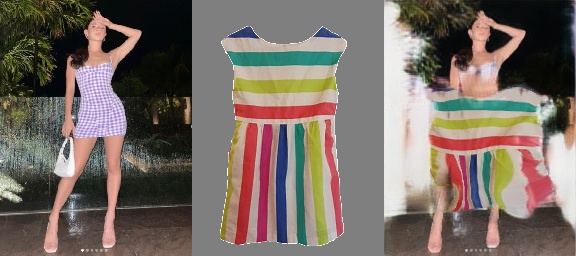

In [ ]:
import cv2 
from google.colab.patches import cv2_imshow
img0 = cv2.imread('/content/PF-AFN/PF-AFN_test/results/demo/PFAFN/'+'0.jpg')
  
# show the output image
cv2_imshow(img0)